<a href="https://colab.research.google.com/github/MattJCR/Stable-Diffusion-Colab/blob/master/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*You need to configure GPU hardware accelerator to work properly*

# **Setup**

In [ ]:
!pip install --upgrade diffusers transformers scipy accelerate
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# Import the required packages
from diffusers import StableDiffusionPipeline
import torch
import gc
import random

gc.collect()

print(torch.__version__)

# Create a StableDiffusionPipeline object and move it to a GPU
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to('cuda')

1.13.0+cu116


Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

# **Stable Diffusion**

seed: -35214030510


  0%|          | 0/50 [00:00<?, ?it/s]

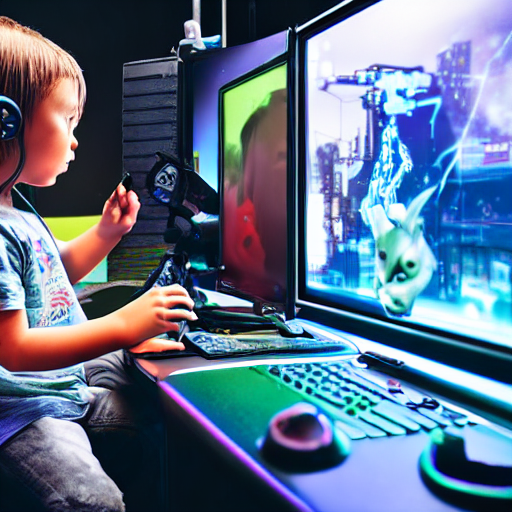

In [ ]:
#@title Configuration { vertical-output: true, form-width: "50%" }

# Set the number of inference steps to use
steps = 20 #@param {type:"slider", min:1, max:100, step:1}
# Define the text prompt
prompt = "Child playing videogames, future room, cyberpunk" #@param {type:"string"}
# Define the seed prompt
seed = None #@param {type:"raw"}
if seed == None:
  seed = random.randint(-99999999999,99999999999)
print('seed:',seed)
# Set the random seed for deterministic output
generator = torch.Generator("cuda").manual_seed(seed)

# Generate the image
image = pipe(prompt, num_inference_steps=steps, generator=generator).images[0]
# image = pipe(prompt, num_inference_steps=steps).images[0]
image